In [1]:
import torch
import torchvision

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

# 基本操作
公式Tutorial参照  
https://pytorch.org/tutorials/beginner/blitz/tensor_tutorial.html

In [6]:
print('Torch version:',torch.__version__)
print('Torchvision version:', torchvision.__version__)

Torch version: 1.4.0
Torchvision version: 0.5.0


In [22]:
# ほぼゼロの値をいれる
x = torch.empty(3, 2)
print(x)

tensor([[1.9809e-36, 0.0000e+00],
        [1.3855e-36, 0.0000e+00],
        [1.4013e-45, 0.0000e+00]])


In [23]:
# [0, 1]の一様分布から要素を作成
x = torch.rand(5, 3)
print(x)

tensor([[0.9185, 0.8774, 0.0070],
        [0.9161, 0.3327, 0.3092],
        [0.9744, 0.3248, 0.9404],
        [0.1426, 0.0115, 0.5365],
        [0.8907, 0.2779, 0.8474]])


In [24]:
# 要素０で作成
x = torch.zeros(3, 2, dtype=torch.long)
print(x)

tensor([[0, 0],
        [0, 0],
        [0, 0]])


In [25]:
# データから直接テンソルを作成
x = torch.tensor([5.5, 3])
print(x)

tensor([5.5000, 3.0000])


In [27]:
# すでにあるテンソルを再利用
x = torch.tensor([])
x =x .new_ones(5, 3, dtype=torch.double)
print(x)

# すでにあるテンソルの形を維持したまま、標準正規分布から要素を初期化する
x = torch.randn_like(x, dtype=torch.float)
print(x)

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]], dtype=torch.float64)
tensor([[-0.8212, -0.1109, -0.6541],
        [ 1.5003,  1.2764, -0.7469],
        [ 1.6199,  1.0891,  0.2063],
        [-0.9459,  1.0846, -0.7105],
        [ 1.0909,  0.0351,  0.1965]])


In [34]:
# size()メソッドで、テンソルの形を確認できる。タプルとして扱うことができる
print(x.size())

row, col = x.size()
print(row, col)

torch.Size([5, 3])
5 3


In [40]:
# テンソルの和を+でとる方法
x = torch.rand(5, 3)
y = torch.rand(5, 3)
print(x + y)

# 和の出力を引数にとる方法
result = torch.empty(5, 3)
torch.add(x, y, out=result)
print(x)

# 加える値を引数にとる方法
result = y.add_(x)
print(x)

tensor([[0.2819, 0.7366, 0.5629],
        [1.1429, 1.2155, 1.0027],
        [1.3398, 0.3298, 1.6270],
        [1.0485, 1.0844, 0.8225],
        [0.6637, 1.2504, 1.2567]])
tensor([[0.0447, 0.2592, 0.0076],
        [0.9984, 0.9092, 0.7719],
        [0.5751, 0.2712, 0.9789],
        [0.9073, 0.9798, 0.8057],
        [0.3744, 0.4343, 0.6920]])
tensor([[0.0447, 0.2592, 0.0076],
        [0.9984, 0.9092, 0.7719],
        [0.5751, 0.2712, 0.9789],
        [0.9073, 0.9798, 0.8057],
        [0.3744, 0.4343, 0.6920]])


In [43]:
x = torch.rand(5, 3)
print(x)
# numpyのようにスライスが使える
print(x[:, 1])

tensor([[0.6708, 0.0255, 0.0998],
        [0.2004, 0.0819, 0.5331],
        [0.0993, 0.3034, 0.0075],
        [0.2796, 0.0449, 0.8617],
        [0.3664, 0.1044, 0.5142]])
tensor([0.0255, 0.0819, 0.3034, 0.0449, 0.1044])


In [45]:
# viewでサイズを変更できる。-1を指定すると要素数を自動で調節してくれる
x = torch.randn(4, 4)
y= x.view(16)
z = x.view(-1, 8)
print(x.size(), y.size(), z.size())

torch.Size([4, 4]) torch.Size([16]) torch.Size([2, 8])


In [55]:
# itemで特定の要素をとりだす
x = torch.randn(2, 3)
x[1,1].item()

-1.9076732397079468

In [61]:
# numpy()メソッドでnunpy型に変更できる
x = torch.ones(5)
y = x.numpy()
print(y)

# torch と　numpyの型の違い
x.add_(1)
print(x)
print(y)

# torch.from_num()でnumpy型をtensor型へ変更できる
a = np.ones(5)
b = torch.from_numpy(a)
np.add(a, 1, out=a)
print(a)
print(b)

[1. 1. 1. 1. 1.]
tensor([2., 2., 2., 2., 2.])
[2. 2. 2. 2. 2.]
[2. 2. 2. 2. 2.]
tensor([2., 2., 2., 2., 2.], dtype=torch.float64)


In [63]:
if torch.cuda.is_available():
    device = torch.device('cuda') # CUDAデバイスのオブジェクトを作成
    y = torch.ones_like(x, device=device) # 直接GPUにテンソルを作成
    x = x.to(device) # to(device)で変数を指定のデバイスにのせられる
    z = x + y
    print(z)
    print(z.to('cpu'), torch.double)

tensor([3., 3., 3., 3., 3.], device='cuda:0')
tensor([3., 3., 3., 3., 3.]) torch.float64


### バックプロパゲーションの説明  
https://pytorch.org/tutorials/beginner/blitz/autograd_tutorial.html http://aidiary.hatenablog.com/entry/20180129/1517233796

In [71]:
# require_grad = True　としてテンソルを作成すると、計算を追うことができる
x = torch.ones(2, 2, requires_grad=True)
print(x)

# grad_fnを属性に持つ
y = x + 2
print(y)

z = y * y * 3
out = z.mean()
print(z, out)

#  勾配伝搬を行う
out.backward()
print(x.grad)

tensor([[1., 1.],
        [1., 1.]], requires_grad=True)
tensor([[3., 3.],
        [3., 3.]], grad_fn=<AddBackward0>)
tensor([[27., 27.],
        [27., 27.]], grad_fn=<MulBackward0>) tensor(27., grad_fn=<MeanBackward0>)
tensor([[4.5000, 4.5000],
        [4.5000, 4.5000]])


In [73]:
# with torch.no_grad() でラッピングすることで勾配計算を止められる
x = torch.randn(3, requires_grad=True)
print((x**2).requires_grad)

with torch.no_grad():
    print((x**2).requires_grad)

True
False


In [76]:
# detach で同じ要素で、勾配を求めない新しいテンソルを作成できる。
x = torch.randn(3, requires_grad=True)
y = x.detach()
print(y.requires_grad)
print(x.eq(y).all())

False
tensor(True)


## ニューラルネットワークの学習
https://pytorch.org/tutorials/beginner/blitz/neural_networks_tutorial.html  

nn.Moduleを継承する。forwardメソッド(入力xからネットワークを出力させる)を定義する必要がある  
backwardメソッドはautogradを使用すると、自動的に定義してくれる  
tourch.nnはミニバッチのみに対応する。nn.Conv2dなら nSamples x nChannels x Height x Widthを受け付ける  
もし１つのサンプルだけなら、input.unsqueeze(0)でfake batch dimensionを加える

### モデルの作成

In [17]:
import torch.nn as nn
import torch.nn.functional as F

# nn.Module - Neural network module.
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        # 1 input image channel, 6 output channels, 3x3 square convolution
        # kernel
        self.conv1 = nn.Conv2d(1, 6, 3)
        self.conv2 = nn.Conv2d(6, 16, 3)

        # an affine operation: y = Wx + b
        # 畳み込み層の出力をflatにさせる
        self.fc1 = nn.Linear(16*6*6, 120) # 6*6 from image dimension
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10) #10 クラスの分類タスク

    def forward(self, x):
        # Max pooling over a (2, 2) window
        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        x = x.view(-1, self.num_flat_features(x)) # 畳み込み層の出力を全結合層に入力するために変換
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
    
    # 畳み込み層の出力のフィルタをflattenさせる
    def num_flat_features(self, x):
        size = x.size()[1:] # バッチ以外の次元を取得
        num_features = 1
        for s in size:
            num_features *=s
        return num_features
        
net = Net()
print(net)

Net(
  (conv1): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=576, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


### フォワード、バックフォーワードの計算

In [33]:
# ネットワークの学習可能なパラメタを取得
params = list(net.parameters())
print(len(params))
print(params[0].size()) # conv1's .weight

# mnistのサイズに合わせる
input = torch.randn(1, 1, 32, 32)
out = net(input)
print(out) # 出力は最後の層の出力のテンソル

# 勾配の初期化
net.zero_grad()
out.backward(torch.randn(1, 10))

10
torch.Size([6, 1, 3, 3])
tensor([[-0.0876, -0.0280,  0.0126,  0.1282,  0.0815,  0.0443,  0.1057, -0.1603,
         -0.0625, -0.0144]], grad_fn=<AddmmBackward>)


### 損失関数の計算
https://pytorch.org/docs/stable/nn.html  
損失関数は(output, target)の形を受け付ける

In [28]:
output = net(input)
target = torch.randn(10) # a dummy target
print(output.size(), target.size())
target = target.view(1, -1) # outputと出力を揃える


# MSE
criterion = nn.MSELoss()

# 損失関数
loss = criterion(output, target)
print(loss)

# backward は損失関数→全結合層→ReLUと戻っていく
print(loss.grad_fn)  # MSELoss
print(loss.grad_fn.next_functions[0][0])  # Linear
print(loss.grad_fn.next_functions[0][0].next_functions[0][0])  # ReLU

# 勾配の初期化　
net.zero_grad()

print('conv1.bias.grad before backward')
print(net.conv1.bias.grad)

loss.backward()

print('conv1.bias.grad after backward')
print(net.conv1.bias.grad)

torch.Size([1, 10]) torch.Size([10])
tensor(0.6030, grad_fn=<MseLossBackward>)
conv1.bias.grad before backward
tensor([0., 0., 0., 0., 0., 0.])
conv1.bias.grad after backward
tensor([-0.0057,  0.0034,  0.0013,  0.0100,  0.0052,  0.0237])


### 重み更新
最もシンプルな更新であるSGDは　weight = weight - learning_rate * gradient

In [30]:
# スクラッチでSGD実装
learning_rate = 0.01
for f in net.parameters():
    f.data.sub_(f.grad.data * learning_rate)

In [35]:
# PyTorchのoptimizerによるSGD実装
import torch.optim as optim

# オプティマイザを作成
optimizer = optim.SGD(net.parameters(), lr=0.01)

optimizer.zero_grad() # 勾配の初期化
output = net(input) # 順伝搬
loss =criterion(output, target) # 損失を計算
loss.backward() # 勾配の計算

optimizer.step()  # 重み更新の実行

## CIFAR10のクラス分類
https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html  
実際にCNNで学習、検証を行う。torchvisionで有名な画像データセットを利用することができる  
https://qiita.com/kazetof/items/6a72926b9f8cd44c218e

### DataLoderの作成
https://pytorch.org/docs/stable/data.html  
data <- transform <- dataloader の順番に作成  
DataLoader(dataset, batch_size=1, shuffle=False, sampler=None,
           batch_sampler=None, num_workers=0, collate_fn=None,
           pin_memory=False, drop_last=False, timeout=0,
           worker_init_fn=None)

In [162]:
import torch, torchvision
import torchvision.transforms as transforms

# 画像のダウンロード
trainset = torchvision.datasets.CIFAR10(root='./cifar10', train=True, 
                                                                       download=True, transform=transform)

testset = torchvision.datasets.CIFAR10(root='./cifar10', train=False,
                                                                       download=True, transform=transform)


# データ処理のtransformクラスの作成
transform = transforms.Compose(
        [transforms.ToTensor(), # Tensor 型に
          transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))]) # 標準化

# 画像と正解ラベルのミニバッチを返すdataloaderの作成
# dataset
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                                                         shuffle=True, num_workers=2)

testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                                                        shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


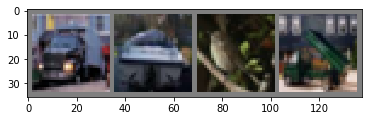

truck  ship  bird truck


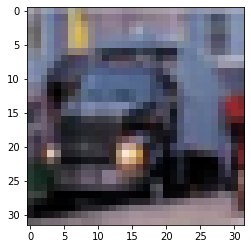

In [145]:
def imshow(img):
    img = img / 2 + 0.5 # plt.imshowの入力が[0,1]なので、合わせてずらしている
    npimg = img.numpy()
    # (channel, width, height)の並びを(width, height, channel)の並びに変更させる
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# trainloader はバッチサイズ4なので、　４枚の画像とラベルを返す
trainiter = iter(trainloader)
images, labels = trainiter.next()

# torchvision.utils.make_gridで画像を１枚に並べられる. nrowで行あたりの画像数を指定
imshow(torchvision.utils.make_grid(images,nrow=4))
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))
imshow(images[0])

### モデルの定義

In [146]:
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
            
        # conv2d(インプットのチャンネルの数、アウトプットのチャンネルの数、カーネルサイズ)
        # https://pytorch.org/docs/master/nn.html#torch.nn.Conv2d
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=6, kernel_size=5)
        
        # pool(kernel_size, stride=None, padding=0)
        # https://pytorch.org/docs/master/nn.html#torch.nn.MaxPool2d
        self.pool = nn.MaxPool2d(2, 2)
        
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 *5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
        
    # 順伝搬
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 *5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

net = Net()

Parameter containing:
tensor([[[[-0.3095, -0.1380, -0.0904],
          [-0.2800, -0.0378,  0.0996],
          [-0.0109, -0.2562,  0.1471]]],


        [[[-0.1761, -0.3114,  0.1285],
          [-0.2515,  0.0139, -0.1866],
          [-0.1420, -0.1050, -0.1126]]]], requires_grad=True)
torch.Size([4, 3, 32, 32])
<class 'torch.Tensor'>


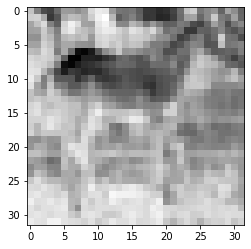

torch.Size([4, 1, 32, 32])


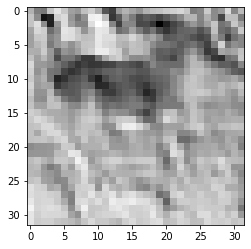

In [147]:
# 畳み込み層を作成した時点で、0付近のランダムなパラメタを入れて準備してくれる
conv = nn.Conv2d(1, 2, 3)
print(conv.weight)

# 畳み込みの様子を可視化
images, labels = trainiter.next()
print(images.size())
print(type(images))
image_plot = images[0][1].numpy()
plt.imshow(image_plot, cmap='Greys', interpolation='nearest')
plt.show()

# モデルの定義
img_input = torch.autograd.Variable(images)
conv = nn.Conv2d(3, 1, 3, padding=1)
pool = nn.MaxPool2d(3, padding=1, stride=1)

# フォワード
conv_output = conv(img_input)
pool_output = pool(conv_output)
print(pool_output.size())

# プロット
conv_plot = conv_output[0][0].data.numpy()
plt.imshow(conv_plot, cmap='Greys', interpolation='nearest')
plt.show()

### 損失関数とオプティマイザの定義

In [148]:
import torch.optim as optim

# 損失関数：交差エントロピー
criterion = nn.CrossEntropyLoss()

# オプティマイザ:momentum SGD
# net.parameters()でモデルのパラメータをジェネレータにして返す
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [149]:
# optimizerの保持しているオブジェクト
print(optimizer.__dict__)

{'defaults': {'lr': 0.001, 'momentum': 0.9, 'dampening': 0, 'weight_decay': 0, 'nesterov': False}, 'state': defaultdict(<class 'dict'>, {}), 'param_groups': [{'params': [Parameter containing:
tensor([[[[-0.0010,  0.0044,  0.0317,  0.1061, -0.0666],
          [ 0.0758,  0.0612, -0.1101,  0.1033, -0.0246],
          [-0.0449,  0.1102,  0.0623, -0.1008, -0.0163],
          [-0.0238,  0.0529, -0.0199,  0.0237,  0.1133],
          [ 0.0576, -0.0868,  0.0842, -0.0078, -0.0834]],

         [[-0.0440, -0.0431, -0.0163,  0.0109,  0.0525],
          [-0.0400, -0.0044,  0.0077, -0.0259, -0.0756],
          [ 0.0636,  0.0198,  0.0713,  0.0907,  0.0678],
          [-0.0937, -0.0051, -0.0153, -0.0655,  0.0221],
          [-0.0989, -0.0764,  0.1149, -0.0841, -0.0464]],

         [[-0.0936, -0.1151, -0.0859,  0.0453,  0.0515],
          [-0.0966,  0.0068, -0.0220,  0.1152, -0.0875],
          [-0.0325,  0.0026, -0.0108, -0.0155,  0.0871],
          [-0.0224, -0.0766, -0.1036,  0.0760,  0.0564],
      

### 学習

In [139]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
net.to(device)
for epoch in range(10):
    
    running_loss = 0.0
    # i　がミニバッチの番号に対応
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data[0].to(device), data[1].to(device) # dataloaderの出力は入力画像とラベル
        
        # 勾配の初期化
        optimizer.zero_grad()
        
        outputs = net(inputs) # 順伝搬
        loss = criterion(outputs, labels) # 損失の計算
        loss.backward() # 逆伝搬
        optimizer.step() # 勾配の更新
         
        running_loss += loss.item() # ミニバッチごとの損失の値を加える
        if i % 2000 == 1999:   # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0
        
print('Finished Training')

[1,  2000] loss: 2.114
[1,  4000] loss: 1.814
[1,  6000] loss: 1.654
[1,  8000] loss: 1.550
[1, 10000] loss: 1.496
[1, 12000] loss: 1.466
[2,  2000] loss: 1.391
[2,  4000] loss: 1.345
[2,  6000] loss: 1.358
[2,  8000] loss: 1.299
[2, 10000] loss: 1.274
[2, 12000] loss: 1.271
[3,  2000] loss: 1.196
[3,  4000] loss: 1.191
[3,  6000] loss: 1.196
[3,  8000] loss: 1.168
[3, 10000] loss: 1.173
[3, 12000] loss: 1.155
[4,  2000] loss: 1.087
[4,  4000] loss: 1.098
[4,  6000] loss: 1.084
[4,  8000] loss: 1.071
[4, 10000] loss: 1.068
[4, 12000] loss: 1.085
[5,  2000] loss: 0.980
[5,  4000] loss: 1.017
[5,  6000] loss: 1.003
[5,  8000] loss: 1.012
[5, 10000] loss: 1.024
[5, 12000] loss: 1.000
[6,  2000] loss: 0.931
[6,  4000] loss: 0.941
[6,  6000] loss: 0.932
[6,  8000] loss: 0.970
[6, 10000] loss: 0.960
[6, 12000] loss: 0.967
[7,  2000] loss: 0.886
[7,  4000] loss: 0.897
[7,  6000] loss: 0.906
[7,  8000] loss: 0.919
[7, 10000] loss: 0.921
[7, 12000] loss: 0.939
[8,  2000] loss: 0.844
[8,  4000] 

### モデルの保存, 読み込み

In [140]:
PATH = './cifar_net.pth'
torch.save(net.state_dict(), PATH)

net = Net()
net.load_state_dict(torch.load(PATH))

<All keys matched successfully>

### テストデータの検証

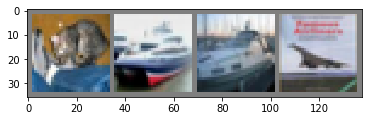

Predicted:    dog   dog   dog   dog
GroundTruth:    cat  ship  ship plane


In [128]:
testiter = iter(testloader)
images, labels = testiter.next()

outputs = net(images)

# torch.maxでテンソルの最大値を求める。第二引数でaxisを指定
# 返り値は、最大値のリストと、最大値のインデックス番号のリスト
_, predicted = torch.max(outputs, 1)

imshow(torchvision.utils.make_grid(images))
print('Predicted: ', ' '.join('%5s' % classes[predicted[j]] for j in range(4)))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [141]:
correct = 0
total = 0
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
net.to(device)
with torch.no_grad():
    for data in testloader:
#        images, labels = data
        inputs, labels = data[0].to(device), data[1].to(device)

        outputs = net(inputs)

        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 62 %


### 訓練と評価を同時に行う

In [170]:
def train_model(net, dataloaders_dict, criterion, optimizer,num_epochs):
    # GPUが使えるかを確認
    device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
    print('使用デバイス:', device)
    
    net.to(device)  # ネットワークをGPUへ
    
    # ネットワークがある程度固定であれば、高速化させる
    torch.backends.cudnn.benchmark = True
    
    # イテレーションカウンタをセット
    iteration = 1
    epoch_train_loss = 0.0 # epochの損失和
    epoch_val_loss = 0.0
    epoch_train_correct = 0.0 # epochの正解率和　
    epoch_val_correct = 0.0
    logs = []
    
    for epoch in range(num_epochs+1):
        print('-------------')
        print('Epoch {}/{}'.format(epoch+1, num_epochs))
        print('-------------')
        
        # epochごとの訓練と検証のループ
        for phase in ['train', 'val']:
            if phase == 'train':
                net.train()
                print('（train）')
            else:
                if ((epoch + 1) % 1 == 0):
                    net.eval()
                    print('-------------')
                    print('（val）')
                else:
                    continue
                    
            for images, labels in dataloaders_dict[phase]:
                # GPUが使えるならGPUにデータを送る
                images = images.to(device)
                labels = labels.to(device)
                
                # optimizerを初期化
                optimizer.zero_grad()
                
                with torch.set_grad_enabled(phase=='train'):
                    # 順伝搬（forward）計算
                    outputs = net(images)
                    
                    loss = criterion(outputs, labels) # 損失の計算
                    _, preds = torch.max(outputs, 1) # ラベルを予測
                    
                    # 訓練時はバックプロパゲーション
                    if phase == 'train':
                        loss.backward() # 勾配の計算
                        
                        optimizer.step()
                        
                        #if (iteration % 10 == 0):
                         #   print('イテレーション {} || Loss: {:.4f}'.format(iteration, loss.item()))
                            
                        epoch_train_loss += loss.item()
                        epoch_train_correct += torch.sum(preds == labels)
                        iteration += 1
                    
                    else:
                        epoch_val_loss += loss.item()
                        epoch_val_correct += torch.sum(preds == labels)
                                                   
        # epochごとの訓練データの正解率
        epoch_train_acc = epoch_train_correct.double(
            ) / len(dataloaders_dict['train'].dataset)

        # epochごとのテストデータの正解率
        epoch_val_acc = epoch_val_correct.double(
            ) / len(dataloaders_dict['val'].dataset)
                                                         
        print('epoch {} || Epoch_TRAIN_Loss:{:.4f} ||Epoch_VAL_Loss:{:.4f}'.format(
            epoch+1, epoch_train_loss, epoch_val_loss))
        print('epoch {} || Epoch_TRAIN_Acc:{:.4f} ||Epoch_VAL_Acc:{:.4f}'.format(
            epoch+1, epoch_train_acc, epoch_val_acc))                                               
        
        # ログを保存
        log_epoch = {'epoch': epoch+1,
                     'train_loss': epoch_train_loss, 
                     'val_loss': epoch_val_loss,
                     'train_acc':epoch_train_acc,
                     'val_acc':epoch_val_acc}
                                                       
        logs.append(log_epoch)
        df = pd.DataFrame(logs)
        df.to_csv("log_output.csv")
        
        epoch_train_loss = 0.0  # epochの損失和
        epoch_val_loss = 0.0  
        epoch_train_correct = 0.0 # epochの正解率和　
        epoch_val_correct = 0.0
        
dataloaders_dict = {'train' : trainloader,'val': testloader}
net = Net()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)
train_model(net=net, dataloaders_dict=dataloaders_dict, criterion=criterion,optimizer=optimizer, num_epochs=20)

使用デバイス: cuda:0
-------------
Epoch 1/20
-------------
（train）
-------------
（val）
epoch 1 || Epoch_TRAIN_Loss:21179.1870 ||Epoch_VAL_Loss:3522.6514
epoch 1 || Epoch_TRAIN_Acc:0.3783 ||Epoch_VAL_Acc:0.4859
-------------
Epoch 2/20
-------------
（train）
-------------
（val）
epoch 2 || Epoch_TRAIN_Loss:16869.7767 ||Epoch_VAL_Loss:3101.6419
epoch 2 || Epoch_TRAIN_Acc:0.5161 ||Epoch_VAL_Acc:0.5546
-------------
Epoch 3/20
-------------
（train）
-------------
（val）
epoch 3 || Epoch_TRAIN_Loss:15216.8476 ||Epoch_VAL_Loss:3093.9396
epoch 3 || Epoch_TRAIN_Acc:0.5671 ||Epoch_VAL_Acc:0.5548
-------------
Epoch 4/20
-------------
（train）
-------------
（val）
epoch 4 || Epoch_TRAIN_Loss:14139.2352 ||Epoch_VAL_Loss:2853.7996
epoch 4 || Epoch_TRAIN_Acc:0.6011 ||Epoch_VAL_Acc:0.5978
-------------
Epoch 5/20
-------------
（train）
-------------
（val）
epoch 5 || Epoch_TRAIN_Loss:13282.1478 ||Epoch_VAL_Loss:2819.1576
epoch 5 || Epoch_TRAIN_Acc:0.6242 ||Epoch_VAL_Acc:0.6056
-------------
Epoch 6/20
----------

## 自作Dataset, Dataloderの作成
https://pytorch.org/tutorials/beginner/data_loading_tutorial.html

In [230]:
import os
import torch
import pandas as pd
from skimage import io, transform
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

Image name: person-7.jpg
Landmarks shape: (68, 2)
First 4 Landmarks: [[32. 65.]
 [33. 76.]
 [34. 86.]
 [34. 97.]]


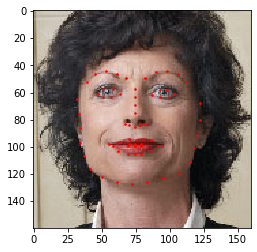

In [231]:
landmarks_frame = pd.read_csv('faces/face_landmarks.csv')
# 特定の画像のインデックス
n = 65
img_name = landmarks_frame['image_name'][n]
# 位置を(x,y)の組をarray形でとる
landmarks = landmarks_frame.iloc[n, 1:].values
landmarks = landmarks.astype('float').reshape(-1, 2)

print('Image name: {}'.format(img_name))
print('Landmarks shape: {}'.format(landmarks.shape))
print('First 4 Landmarks: {}'.format(landmarks[:4]))

def show_landmarks(image, landmarks):
    plt.imshow(image)
    plt.scatter(landmarks[:, 0], landmarks[:, 1], s=10, marker='.', c='r')
    plt.pause(0.001)
    
plt.figure()
img_path = os.path.join('faces', img_name)
show_landmarks(io.imread(img_path), landmarks)
plt.show()

## Datasetクラス
自作でdatasetクラスを作成する際は、torch.utils.data.Datasetを継承する必要がある    
２つのメソッドを必ず作成する必要がある  
・\__len__:データセットのサイズを返すメソッド len(dataset)   
・\__getitem__: i番目の画像を返すメソッド dataset[i]  
画像の読み込みは\__getitem__で行う。\__init__で一気に読み込むのではなく、必要となった時に一枚ずつ読み込む方がメモリを温存できる  
Datasetクラスは画像と、ラベルのペアを出力してくれるクラス

In [232]:
class FaceLandmarksDataset(Dataset):
    def __init__(self, csv_file, root_dir, transform=None):
        """
        Args:
            csv_file (string): Path to the csv file with annotations.
            root_dir (string): Directory with all the images.
            transform (callable, optional): Optional transform to be applied
                on a sample.
        """
        self.landmarks_frame = pd.read_csv(csv_file)
        self.root_dir = root_dir
        self.transform = transform

    def __len__(self):
        return len(self.landmarks_frame)
    
    def __getitem__(self, idx):
        if torch.is_tensor(idx): # テンソルの場合は、リストに変換
            idx = idx.tolist()
        # 画像パス
        img_name = os.path.join(self.root_dir, self.landmarks_frame.iloc[idx, 0])
        image = io.imread(img_name)
        landmarks = self.landmarks_frame.iloc[idx, 1:]
        landmarks = np.array([landmarks])
        landmarks = landmarks.astype('float').reshape(-1, 2)
        sample = {'image' : image, 'landmarks' : landmarks}
        
        if self.transform:
            sample = self.transform(sample)
            
        return sample

0 (324, 215, 3) (68, 2)
1 (500, 333, 3) (68, 2)
2 (250, 258, 3) (68, 2)
3 (434, 290, 3) (68, 2)


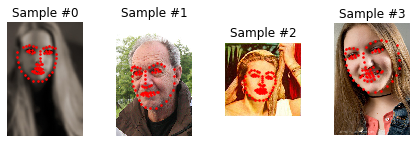

In [222]:
def show_landmarks(image, landmarks, ax):
    """Show image with landmarks"""
    ax.imshow(image)
    ax.scatter(landmarks[:, 0], landmarks[:, 1], s=10, marker='.', c='r')
    

    face_dataset = FaceLandmarksDataset(csv_file='faces/face_landmarks.csv',
                                                                       root_dir='faces/')
fig = plt.figure()

# __len__を定義したので、画像の合計数がlenで求められる
for i in range(len(face_dataset)):
    sample = face_dataset[i]
    print(i, sample['image'].shape, sample['landmarks'].shape)
    
    ax = plt.subplot(1, 4, i + 1)
    plt.tight_layout()
    ax.set_title('Sample #{}'.format(i))
    ax.axis('off')
    show_landmarks(sample['image'], sample['landmarks'], ax)
        
    if i == 3:
        #plt.show()
        break

### DataLoader の作成
画像とラベルを出力させるdataset オブジェクトを用いて、バットを出力させるDataLoaderを作成  
torch.utils.data.DataLoaderによって簡単に作成できる。  
collate_fnでどのようにサンプルをバッチ化させるかを決めることができる。

In [252]:
transformed_dataset = FaceLandmarksDataset(csv_file='faces/face_landmarks.csv',
                                           root_dir='faces/',
                                           transform=transforms.Compose([
                                                            transforms.Resize(124)]))

dataloader = DataLoader(transformed_dataset, batch_size=4,
                        shuffle=True, num_workers=4)

# TensorBoard によるモデルの可視化　
Fashion-Mnistを用いて、modelの可視化を行う  
https://pytorch.org/tutorials/intermediate/tensorboard_tutorial.html

In [50]:
import matplotlib.pyplot as plt
import numpy as np

import torch, torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

## DataLoaderの作成

In [125]:
# 画像データセットのダウンロード時の変形処理
transform = transforms.Compose(
    [transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))])

# デフォルトでpytorchにあるデータでdatasetを簡単に作ってくれる
trainset = torchvision.datasets.FashionMNIST('./data_pytorch',
    download=True,
    train=True,
    transform=transform)
testset = torchvision.datasets.FashionMNIST('./data_pytorch/',
    download=True,
    train=False,
    transform=transform)

# DataLoader
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                        shuffle=True, num_workers=2)


testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                        shuffle=False, num_workers=2)
# constant for classes
classes = ('T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
        'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot')

# helper function to show an image
# (used in the `plot_classes_preds` function below)
def matplotlib_imshow(img, one_channel=False):
    if one_channel:
        img = img.mean(dim=0)
    img = img / 2 + 0.5     # unnormalize
    img = img.detach().cpu().clone()
    npimg = img.numpy()
    if one_channel:
        plt.imshow(npimg, cmap="Greys")
    else:
        plt.imshow(np.transpose(npimg, (1, 2, 0)))

## モデルの定義

In [122]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 *4 *4, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
        
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16*4 * 4)
        x = self.fc1(x)
        x = self.fc2(x)
        x = self.fc3(x)
        return x

net = Net()

## 損失関数とオプティマイザの設定

In [123]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

## TensorBorardのセットアップ

In [46]:
from torch.utils.tensorboard import SummaryWriter

# TensorBoardに情報を書くためのオブジェクトを作成
writer = SummaryWriter('runs/fashion_mnist_experiment_1')

## TensorBoardへの画像の書き込み

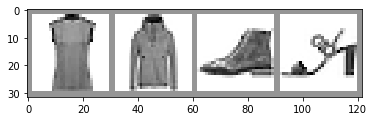

In [67]:
dataiter = iter(trainloader)
images, labels = dataiter.next()

img_grid = torchvision.utils.make_grid(images)
matplotlib_imshow(img_grid, one_channel=True)

# TensorBoardへの書き込み
writer.add_image('four_fashion_mnist_images', img_grid)

## TensorBoardへのモデルの書き込み

In [72]:
writer.add_graph(net, images)
writer.close()

In [92]:
def select_n_random(data, labels, n=100):
        assert len(data) == len(labels)
        perm = torch.randperm(len(data)) # torch.randperm(n) nまでの数でランダムな数の組みを作る
        return data[perm][:n], labels[perm][:n]
    
images, labels = select_n_random(trainset.data, trainset.targets)

class_labels = [classes[lab] for lab in labels]

features = images.view(-1, 28 * 28)
# 画像の次元削減を可視化
writer.add_embedding(features,
                    metadata=class_labels,
                    label_img=images.unsqueeze(1)) # 列を追加
writer.close()

In [84]:
print(torch.randperm(20))
# datasetオブジェクトのインスタンス変数にはdata, targetがある
# https://pytorch.org/docs/stable/torchvision/datasets.html
print(trainset.data.shape, trainset.targets) 

tensor([10,  3,  8,  2,  4, 16,  7, 17,  6, 18, 12,  9, 15, 11,  5,  0, 19, 13,
        14,  1])
torch.Size([60000, 28, 28]) tensor([9, 0, 0,  ..., 3, 0, 5])


## TensoBoardへモデルの学習の様子を書き込む

In [114]:
def images_to_probs(net, images):
    '''
    Generates predictions and corresponding probabilities from a trained
    network and a list of images
    '''
    output = net(images)
    # convert output probabilities to predicted class
    _, preds_tensor = torch.max(output, 1)
    cpu_device = torch.device('cpu')
    preds_tensor.to(cpu_device)
    preds_tensor = preds_tensor.detach().cpu().clone()
    preds = np.squeeze(preds_tensor.numpy()) # np.squeeze()でテンソルの次元を削減
    return preds, [F.softmax(el, dim=0)[i].item() for i, el in zip(preds, output)] # 予測ラベルと、確率を返す


def plot_classes_preds(net, images, labels):
    '''
    Generates matplotlib Figure using a trained network, along with images
    and labels from a batch, that shows the network's top prediction along
    with its probability, alongside the actual label, coloring this
    information based on whether the prediction was correct or not.
    Uses the "images_to_probs" function.
    '''
    preds, probs = images_to_probs(net, images)
    # plot the images in the batch, along with predicted and true labels
    fig = plt.figure(figsize=(12, 48))
    for idx in np.arange(4): # バッチサイズ４なので、4枚の画像を出力
        ax = fig.add_subplot(1, 4, idx+1, xticks=[], yticks=[])
        matplotlib_imshow(images[idx], one_channel=True)
        ax.set_title("{0}, {1:.1f}%\n(label: {2})".format(
            classes[preds[idx]],
            probs[idx] * 100.0,
            classes[labels[idx]]),
                    color=("green" if preds[idx]==labels[idx].item() else "red"))
    return fig

In [127]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
net.to(device)
running_loss = 0.0
for epoch in range(1):  # loop over the dataset multiple times

    for i, data in enumerate(trainloader, 0):

        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data[0].to(device), data[1].to(device)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        
        # 1000バッチごとに保存
        if i % 1000 == 999:
            writer.add_scalar('training loss', 
                                          running_loss / 1000, 
                                          epoch*len(trainloader)+i) # イテレーション回数
            writer.add_figure('prediction vs. actuals',
                                             plot_classes_preds(net, inputs, labels))
            running_loss = 0.0
            
print('Finished Training')

Finished Training


## テストデータのAUCをTensoBoard へ書き込む

In [129]:
# 2. gets the preds in a test_size Tensor
# takes ~10 seconds to run
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
net.to(device)

class_probs = []
class_preds = []
with torch.no_grad():
    for data in testloader:
        images, labels = data[0].to(device), data[1].to(device)
        output = net(images)
        class_probs_batch = [F.softmax(el, dim=0) for el in output]
        _, class_preds_batch = torch.max(output, 1)

        class_probs.append(class_probs_batch)
        class_preds.append(class_preds_batch)
        
test_probs = torch.cat([torch.stack(batch) for batch in class_probs])
test_preds = torch.cat(class_preds)

# helper function
# AUCを表示
def add_pr_curve_tensorboard(class_index, test_probs, test_preds, global_step=0):
    '''
    Takes in a "class_index" from 0 to 9 and plots the corresponding
    precision-recall curve
    '''
    tensorboard_preds = test_preds == class_index
    tensorboard_probs = test_probs[:, class_index]

    writer.add_pr_curve(classes[class_index],
                        tensorboard_preds,
                        tensorboard_probs,
                        global_step=global_step)
    writer.close()

# plot all the pr curves
for i in range(len(classes)):
    add_pr_curve_tensorboard(i, test_probs, test_preds)

# 物体検出
https://pytorch.org/tutorials/intermediate/torchvision_tutorial.html  
Mask R-CNNの記事  
https://qiita.com/shtmr/items/4283c851bc3d9721ed96  

In [6]:
import os
import numpy as np
import torch
from PIL import Image

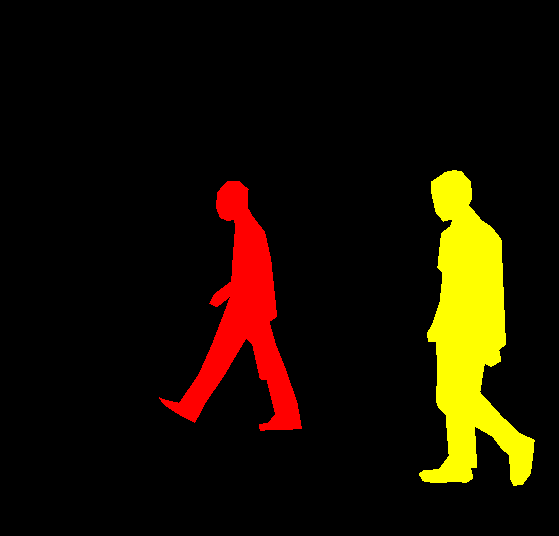

In [7]:
Image.open('data_pytorch/PennFudanPed/PNGImages/FudanPed00001.png')
mask = Image.open('data_pytorch/PennFudanPed/PedMasks/FudanPed00001_mask.png')
# each mask instance has a different color, from zero to N, where
# N is the number of instances. In order to make visualization easier,
# let's adda color palette to the mask.
mask.putpalette([
    0, 0, 0, # black background
    255, 0, 0, # index 1 is red
    255, 255, 0, # index 2 is yellow
    255, 153, 0, # index 3 is orange
])
mask

In [8]:
class PennFudanDataset(object):
    def __init__(self, root, transforms):
        self.root = root
        self.transforms = transforms
        # load all image files, sorting them to
        # ensure that they are aligned
        self.imgs = list(sorted(os.listdir(os.path.join(root, "PNGImages"))))
        self.masks = list(sorted(os.listdir(os.path.join(root, "PedMasks"))))

        
    def __len__(self):
        return len(self.imgs)
    
    def __getitem__(self, idx):
        # load images ad masks
        img_path = os.path.join(self.root, "PNGImages", self.imgs[idx])
        mask_path = os.path.join(self.root, "PedMasks", self.masks[idx])
        img = Image.open(img_path).convert("RGB")
        # note that we haven't converted the mask to RGB,
        # because each color corresponds to a different instance
        # with 0 being background
        mask = Image.open(mask_path)
        # convert the PIL Image into a numpy array
        mask = np.array(mask)
        # instances are encoded as different colors
        obj_ids = np.unique(mask)
        # first id is the background, so remove it
        obj_ids = obj_ids[1:]

        # split the color-encoded mask into a set
        # of binary masks
        masks = mask == obj_ids[:, None, None]

        # get bounding box coordinates for each mask
        num_objs = len(obj_ids)
        boxes = []
        for i in range(num_objs):
            pos = np.where(masks[i])
            xmin = np.min(pos[1])
            xmax = np.max(pos[1])
            ymin = np.min(pos[0])
            ymax = np.max(pos[0])
            boxes.append([xmin, ymin, xmax, ymax])

        # convert everything into a torch.Tensor
        boxes = torch.as_tensor(boxes, dtype=torch.float32)
        # there is only one class
        labels = torch.ones((num_objs,), dtype=torch.int64)
        masks = torch.as_tensor(masks, dtype=torch.uint8)

        image_id = torch.tensor([idx])
        area = (boxes[:, 3] - boxes[:, 1]) * (boxes[:, 2] - boxes[:, 0])
        # suppose all instances are not crowd
        iscrowd = torch.zeros((num_objs,), dtype=torch.int64)

        target = {}
        target["boxes"] = boxes
        target["labels"] = labels
        target["masks"] = masks
        target["image_id"] = image_id
        target["area"] = area
        target["iscrowd"] = iscrowd

        if self.transforms is not None:
            img, target = self.transforms(img, target)

        return img, target

## Finetuning

In [12]:
import torchvision
from torchvision.models.detection.faster_rcnn import FastRCNNPredictor

model = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=True)

# 新しいクラス
num_classes = 2 # 1 class (person) + background

# get number of input features for the classifier
in_features = model.roi_heads.box_predictor.cls_score.in_features

# replace the pre-trained head with a new one
model.roi_heads.box_predictor = FastRCNNPredictor(in_features, num_classes)

## RCNNのバックボーン部分をモデルに加える

In [14]:
import torchvision
from torchvision.models.detection import FasterRCNN
from torchvision.models.detection.rpn import AnchorGenerator

# load a pre-trained model for classification and return
# only the features
backbone = torchvision.models.mobilenet_v2(pretrained=True).features

# FasterRCNN needs to know the number of
# output channels in a backbone. For mobilenet_v2, it's 1280
# so we need to add it here
backbone.out_channels = 1280

# let's make the RPN generate 5 x 3 anchors per spatial
# location, with 5 different sizes and 3 different aspect
# ratios. We have a Tuple[Tuple[int]] because each feature
# map could potentially have different sizes and
# aspect ratios
anchor_generator = AnchorGenerator(sizes=((32, 64, 128, 256, 512),),
                                   aspect_ratios=((0.5, 1.0, 2.0),))

# let's define what are the feature maps that we will
# use to perform the region of interest cropping, as well as
# the size of the crop after rescaling.
# if your backbone returns a Tensor, featmap_names is expected to
# be [0]. More generally, the backbone should return an
# OrderedDict[Tensor], and in featmap_names you can choose which
# feature maps to use.
roi_pooler = torchvision.ops.MultiScaleRoIAlign(featmap_names=[0],
                                                output_size=7,
                                                sampling_ratio=2)

# put the pieces together inside a FasterRCNN model
model = FasterRCNN(backbone,
                   num_classes=2,
                   rpn_anchor_generator=anchor_generator,
                   box_roi_pool=roi_pooler)

Downloading: "https://download.pytorch.org/models/mobilenet_v2-b0353104.pth" to /home/nagae/.cache/torch/checkpoints/mobilenet_v2-b0353104.pth
100.0%


## RCNNのセグメンテーション予測部分を追加

In [25]:
from torchvision.models.detection.faster_rcnn import FastRCNNPredictor
from torchvision.models.detection.mask_rcnn import MaskRCNNPredictor


def get_instance_segmentation_model(num_classes):
    # load an instance segmentation model pre-trained on COCO
    model = torchvision.models.detection.maskrcnn_resnet50_fpn(pretrained=True)

    # get the number of input features for the classifier
    in_features = model.roi_heads.box_predictor.cls_score.in_features
    # replace the pre-trained head with a new one
    model.roi_heads.box_predictor = FastRCNNPredictor(in_features, num_classes)

    # now get the number of input features for the mask classifier
    in_features_mask = model.roi_heads.mask_predictor.conv5_mask.in_channels
    hidden_layer = 256
    # and replace the mask predictor with a new one
    model.roi_heads.mask_predictor = MaskRCNNPredictor(in_features_mask,
                                                       hidden_layer,
                                                       num_classes)

    return model

In [26]:
import transforms as T

def get_transform(train):
    transforms = []
    transforms.append(T.ToTensor())
    if train:
        transforms.append(T.RandomHorizontalFlip(0.5))
    return T.Compose(transforms)

In [27]:
# use our dataset and defined transformations
dataset = PennFudanDataset('data_pytorch/PennFudanPed', get_transform(train=True))
dataset_test = PennFudanDataset('data_pytorch/PennFudanPed', get_transform(train=False))

# split the dataset in train and test set
torch.manual_seed(1)
indices = torch.randperm(len(dataset)).tolist()
dataset = torch.utils.data.Subset(dataset, indices[:-50])
dataset_test = torch.utils.data.Subset(dataset_test, indices[-50:])

# define training and validation data loaders
data_loader = torch.utils.data.DataLoader(
    dataset, batch_size=2, shuffle=True, num_workers=4,
    collate_fn=utils.collate_fn)

data_loader_test = torch.utils.data.DataLoader(
    dataset_test, batch_size=1, shuffle=False, num_workers=4,
    collate_fn=utils.collate_fn)

In [28]:
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

# our dataset has two classes only - background and person
num_classes = 2

# get the model using our helper function
model = get_instance_segmentation_model(num_classes)
# move model to the right device
model.to(device)

# construct an optimizer
params = [p for p in model.parameters() if p.requires_grad]
optimizer = torch.optim.SGD(params, lr=0.005,
                            momentum=0.9, weight_decay=0.0005)

# and a learning rate scheduler which decreases the learning rate by
# 10x every 3 epochs
lr_scheduler = torch.optim.lr_scheduler.StepLR(optimizer,
                                               step_size=3,
                                               gamma=0.1)

Downloading: "https://download.pytorch.org/models/maskrcnn_resnet50_fpn_coco-bf2d0c1e.pth" to /home/nagae/.cache/torch/checkpoints/maskrcnn_resnet50_fpn_coco-bf2d0c1e.pth
13.8%IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

36.7%IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

60.0%IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the con

In [30]:
from engine import train_one_epoch, evaluate
# let's train it for 10 epochs
num_epochs = 10

for epoch in range(num_epochs):
    # train for one epoch, printing every 10 iterations
    train_one_epoch(model, optimizer, data_loader, device, epoch, print_freq=10)
    # update the learning rate
    lr_scheduler.step()
    # evaluate on the test dataset
    evaluate(model, data_loader_test, device=device)

Epoch: [0]  [ 0/60]  eta: 0:01:48  lr: 0.000090  loss: 3.5784 (3.5784)  loss_classifier: 0.7385 (0.7385)  loss_box_reg: 0.1523 (0.1523)  loss_mask: 2.6620 (2.6620)  loss_objectness: 0.0181 (0.0181)  loss_rpn_box_reg: 0.0076 (0.0076)  time: 1.8013  data: 0.1491  max mem: 2303
Epoch: [0]  [10/60]  eta: 0:00:23  lr: 0.000936  loss: 1.5785 (2.1231)  loss_classifier: 0.4534 (0.4968)  loss_box_reg: 0.1843 (0.1905)  loss_mask: 0.9259 (1.4015)  loss_objectness: 0.0181 (0.0238)  loss_rpn_box_reg: 0.0090 (0.0105)  time: 0.4705  data: 0.0179  max mem: 2861
Epoch: [0]  [20/60]  eta: 0:00:16  lr: 0.001783  loss: 0.8689 (1.4333)  loss_classifier: 0.2365 (0.3405)  loss_box_reg: 0.1548 (0.1737)  loss_mask: 0.4021 (0.8843)  loss_objectness: 0.0181 (0.0228)  loss_rpn_box_reg: 0.0100 (0.0120)  time: 0.3325  data: 0.0043  max mem: 2862
Epoch: [0]  [30/60]  eta: 0:00:11  lr: 0.002629  loss: 0.5282 (1.1221)  loss_classifier: 0.0977 (0.2563)  loss_box_reg: 0.1286 (0.1598)  loss_mask: 0.2488 (0.6762)  loss_ob

Epoch: [2]  [ 0/60]  eta: 0:00:28  lr: 0.005000  loss: 0.1318 (0.1318)  loss_classifier: 0.0195 (0.0195)  loss_box_reg: 0.0068 (0.0068)  loss_mask: 0.0981 (0.0981)  loss_objectness: 0.0010 (0.0010)  loss_rpn_box_reg: 0.0063 (0.0063)  time: 0.4719  data: 0.1427  max mem: 3595
Epoch: [2]  [10/60]  eta: 0:00:17  lr: 0.005000  loss: 0.1855 (0.1764)  loss_classifier: 0.0305 (0.0309)  loss_box_reg: 0.0151 (0.0171)  loss_mask: 0.1122 (0.1194)  loss_objectness: 0.0007 (0.0008)  loss_rpn_box_reg: 0.0063 (0.0082)  time: 0.3540  data: 0.0163  max mem: 3595
Epoch: [2]  [20/60]  eta: 0:00:13  lr: 0.005000  loss: 0.1516 (0.1629)  loss_classifier: 0.0210 (0.0260)  loss_box_reg: 0.0106 (0.0132)  loss_mask: 0.1085 (0.1157)  loss_objectness: 0.0003 (0.0009)  loss_rpn_box_reg: 0.0045 (0.0071)  time: 0.3305  data: 0.0037  max mem: 3595
Epoch: [2]  [30/60]  eta: 0:00:10  lr: 0.005000  loss: 0.1589 (0.1835)  loss_classifier: 0.0227 (0.0314)  loss_box_reg: 0.0104 (0.0170)  loss_mask: 0.1161 (0.1252)  loss_ob

Epoch: [4]  [ 0/60]  eta: 0:00:24  lr: 0.000500  loss: 0.1064 (0.1064)  loss_classifier: 0.0067 (0.0067)  loss_box_reg: 0.0032 (0.0032)  loss_mask: 0.0920 (0.0920)  loss_objectness: 0.0001 (0.0001)  loss_rpn_box_reg: 0.0043 (0.0043)  time: 0.4078  data: 0.1215  max mem: 3596
Epoch: [4]  [10/60]  eta: 0:00:17  lr: 0.000500  loss: 0.1576 (0.1627)  loss_classifier: 0.0227 (0.0224)  loss_box_reg: 0.0112 (0.0129)  loss_mask: 0.1110 (0.1189)  loss_objectness: 0.0006 (0.0009)  loss_rpn_box_reg: 0.0073 (0.0076)  time: 0.3556  data: 0.0144  max mem: 3596
Epoch: [4]  [20/60]  eta: 0:00:13  lr: 0.000500  loss: 0.1576 (0.1609)  loss_classifier: 0.0227 (0.0234)  loss_box_reg: 0.0088 (0.0114)  loss_mask: 0.1110 (0.1186)  loss_objectness: 0.0004 (0.0008)  loss_rpn_box_reg: 0.0063 (0.0067)  time: 0.3369  data: 0.0038  max mem: 3596
Epoch: [4]  [30/60]  eta: 0:00:10  lr: 0.000500  loss: 0.1505 (0.1669)  loss_classifier: 0.0256 (0.0269)  loss_box_reg: 0.0086 (0.0124)  loss_mask: 0.1003 (0.1191)  loss_ob

Epoch: [6]  [ 0/60]  eta: 0:00:32  lr: 0.000050  loss: 0.1673 (0.1673)  loss_classifier: 0.0287 (0.0287)  loss_box_reg: 0.0117 (0.0117)  loss_mask: 0.1195 (0.1195)  loss_objectness: 0.0001 (0.0001)  loss_rpn_box_reg: 0.0073 (0.0073)  time: 0.5440  data: 0.1456  max mem: 3596
Epoch: [6]  [10/60]  eta: 0:00:19  lr: 0.000050  loss: 0.1439 (0.1467)  loss_classifier: 0.0169 (0.0219)  loss_box_reg: 0.0054 (0.0079)  loss_mask: 0.1020 (0.1111)  loss_objectness: 0.0002 (0.0004)  loss_rpn_box_reg: 0.0061 (0.0054)  time: 0.3893  data: 0.0166  max mem: 3596
Epoch: [6]  [20/60]  eta: 0:00:15  lr: 0.000050  loss: 0.1439 (0.1539)  loss_classifier: 0.0179 (0.0253)  loss_box_reg: 0.0064 (0.0103)  loss_mask: 0.1019 (0.1110)  loss_objectness: 0.0003 (0.0008)  loss_rpn_box_reg: 0.0061 (0.0066)  time: 0.3739  data: 0.0040  max mem: 3596
Epoch: [6]  [30/60]  eta: 0:00:11  lr: 0.000050  loss: 0.1444 (0.1566)  loss_classifier: 0.0221 (0.0277)  loss_box_reg: 0.0084 (0.0103)  loss_mask: 0.1019 (0.1108)  loss_ob

Epoch: [8]  [ 0/60]  eta: 0:00:35  lr: 0.000050  loss: 0.1546 (0.1546)  loss_classifier: 0.0302 (0.0302)  loss_box_reg: 0.0075 (0.0075)  loss_mask: 0.1143 (0.1143)  loss_objectness: 0.0001 (0.0001)  loss_rpn_box_reg: 0.0026 (0.0026)  time: 0.5896  data: 0.2472  max mem: 3596
Epoch: [8]  [10/60]  eta: 0:00:19  lr: 0.000050  loss: 0.1523 (0.1554)  loss_classifier: 0.0277 (0.0260)  loss_box_reg: 0.0075 (0.0115)  loss_mask: 0.1103 (0.1110)  loss_objectness: 0.0003 (0.0008)  loss_rpn_box_reg: 0.0050 (0.0062)  time: 0.3898  data: 0.0251  max mem: 3596
Epoch: [8]  [20/60]  eta: 0:00:14  lr: 0.000050  loss: 0.1511 (0.1602)  loss_classifier: 0.0243 (0.0245)  loss_box_reg: 0.0093 (0.0118)  loss_mask: 0.1092 (0.1160)  loss_objectness: 0.0003 (0.0006)  loss_rpn_box_reg: 0.0070 (0.0072)  time: 0.3607  data: 0.0035  max mem: 3596
Epoch: [8]  [30/60]  eta: 0:00:10  lr: 0.000050  loss: 0.1408 (0.1559)  loss_classifier: 0.0198 (0.0241)  loss_box_reg: 0.0087 (0.0118)  loss_mask: 0.1007 (0.1124)  loss_ob

In [31]:
# pick one image from the test set
img, _ = dataset_test[0]
# put the model in evaluation mode
model.eval()
with torch.no_grad():
    prediction = model([img.to(device)])

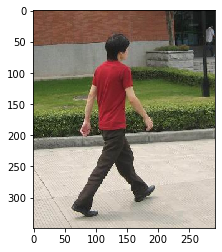

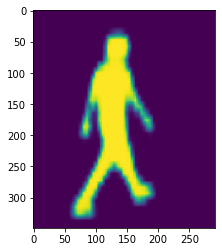

In [35]:
plt.imshow(Image.fromarray(img.mul(255).permute(1, 2, 0).byte().numpy()))
plt.show()
plt.imshow(Image.fromarray(prediction[0]['masks'][0, 0].mul(255).byte().cpu().numpy()))
plt.show()